# Laboration - Covid-19

## Exercise 1. Covid-19 data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### a) Initial analyses

In [2]:
covid = pd.read_excel("data/Folkhalsomyndigheten_Covid19.xlsx", sheet_name=8)
covid #Exploring both head and tail at once

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.000000
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.000000
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.000000
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.000000
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2021,37,6266,60,137,1145764,11039,24,7823,52,5.0,14807,1426.599976
85,2021,38,4298,41,101,1150062,11080,21,7844,40,3.9,14847,1430.400024
86,2021,39,4241,41,82,1154303,11121,17,7861,37,3.6,14884,1434.000000
87,2021,40,4141,40,81,1158444,11161,15,7876,42,4.0,14926,1438.099976


In [3]:
#There are no missing values (89 rows/weeks and 89 non-null values).
#The data type is either int or float and seems to be appropriately used.
covid.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              89 non-null     int64  
 1   veckonummer                     89 non-null     int64  
 2   Antal_fall_vecka                89 non-null     int64  
 3   Antal_fall_100000inv_vecka      89 non-null     int64  
 4   Antal_fall_100000inv_14dagar    89 non-null     int64  
 5   Kum_antal_fall                  89 non-null     int64  
 6   Kum_fall_100000inv              89 non-null     int64  
 7   Antal_nyaintensivvårdade_vecka  89 non-null     int64  
 8   Kum_antal_intensivvårdade       89 non-null     int64  
 9   Antal_avlidna_vecka             89 non-null     int64  
 10  Antal_avlidna_milj_inv_vecka    89 non-null     float64
 11  Kum_antal_avlidna               89 non-null     int64  
 12  Kum_antal_avlidna_milj_inv      89 non

In [4]:
covid.describe()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
count,89.000000,89.000000,89.000000,89.000000,89.000000,8.900000e+01,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,2020.460674,25.584270,13061.865169,126.011236,251.584270,4.885261e+05,4709.325843,88.606742,4261.741573,167.910112,16.233708,8923.303371,860.923595
std,0.501275,13.713637,14210.652869,137.184472,272.989003,4.559136e+05,4391.041264,83.646662,2609.965149,204.302952,19.765609,5126.703711,493.286226
min,2020.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,14.000000,2179.000000,21.000000,46.000000,7.279100e+04,705.000000,14.000000,2491.000000,17.000000,1.600000,5621.000000,544.299988
50%,2020.000000,25.000000,4608.000000,44.000000,100.000000,3.380260e+05,3273.000000,59.000000,3638.000000,82.000000,7.900000,8135.000000,787.700012
75%,2021.000000,36.000000,25405.000000,246.000000,485.000000,1.044862e+06,10067.000000,153.000000,7348.000000,235.000000,22.799999,14416.000000,1388.900024
max,2021.000000,53.000000,46177.000000,447.000000,869.000000,1.162506e+06,11200.000000,289.000000,7886.000000,664.000000,64.300003,14944.000000,1439.800049


In [5]:
covid["år"].value_counts() #The data includes 48 weeks from 2020 and 41 weeks for 2021

2020    48
2021    41
Name: år, dtype: int64

### b) Create a "Vecka" column

In [6]:
covid["veckonummer"] = covid["år"].astype(str) + "v" + covid["veckonummer"].astype(str) #
covid = covid.rename({"veckonummer":"Vecka"}, axis=1).drop("år", axis=1)
covid.head()

,Vecka,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020v6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020v7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020v8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020v9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020v10,211,2,2,225,2,3,3,0,0.0,0,0.0


In [18]:
covid["Vecka"].iloc[88]

'2021v41'

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.2   

### c) Plot number of deceased per week

/var/folders/11/k_09161j4vnft7tn925fp6600000gn/T/ipykernel_3694/4089892951.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_yticklabels(labels=plot.get_yticks().astype(int), size=5)
/var/folders/11/k_09161j4vnft7tn925fp6600000gn/T/ipykernel_3694/4089892951.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_yticklabels(labels=plot.get_yticks().astype(int), size=5)
/var/folders/11/k_09161j4vnft7tn925fp6600000gn/T/ipykernel_3694/4089892951.py:27: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plot3.legend(["Antal_avlidna_vecka", "Antal_fall_vecka"], labels=["Deceased per Week", "New Cases per Week"], fontsize=4.5, loc="upper left")
/var/folders/11/k_09161j4vnft7tn925fp6600000gn/T/ipykernel_3694/4089892951.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_yticklabels(labels=plot.get_yticks().astype(int), size=5)
/var/fol

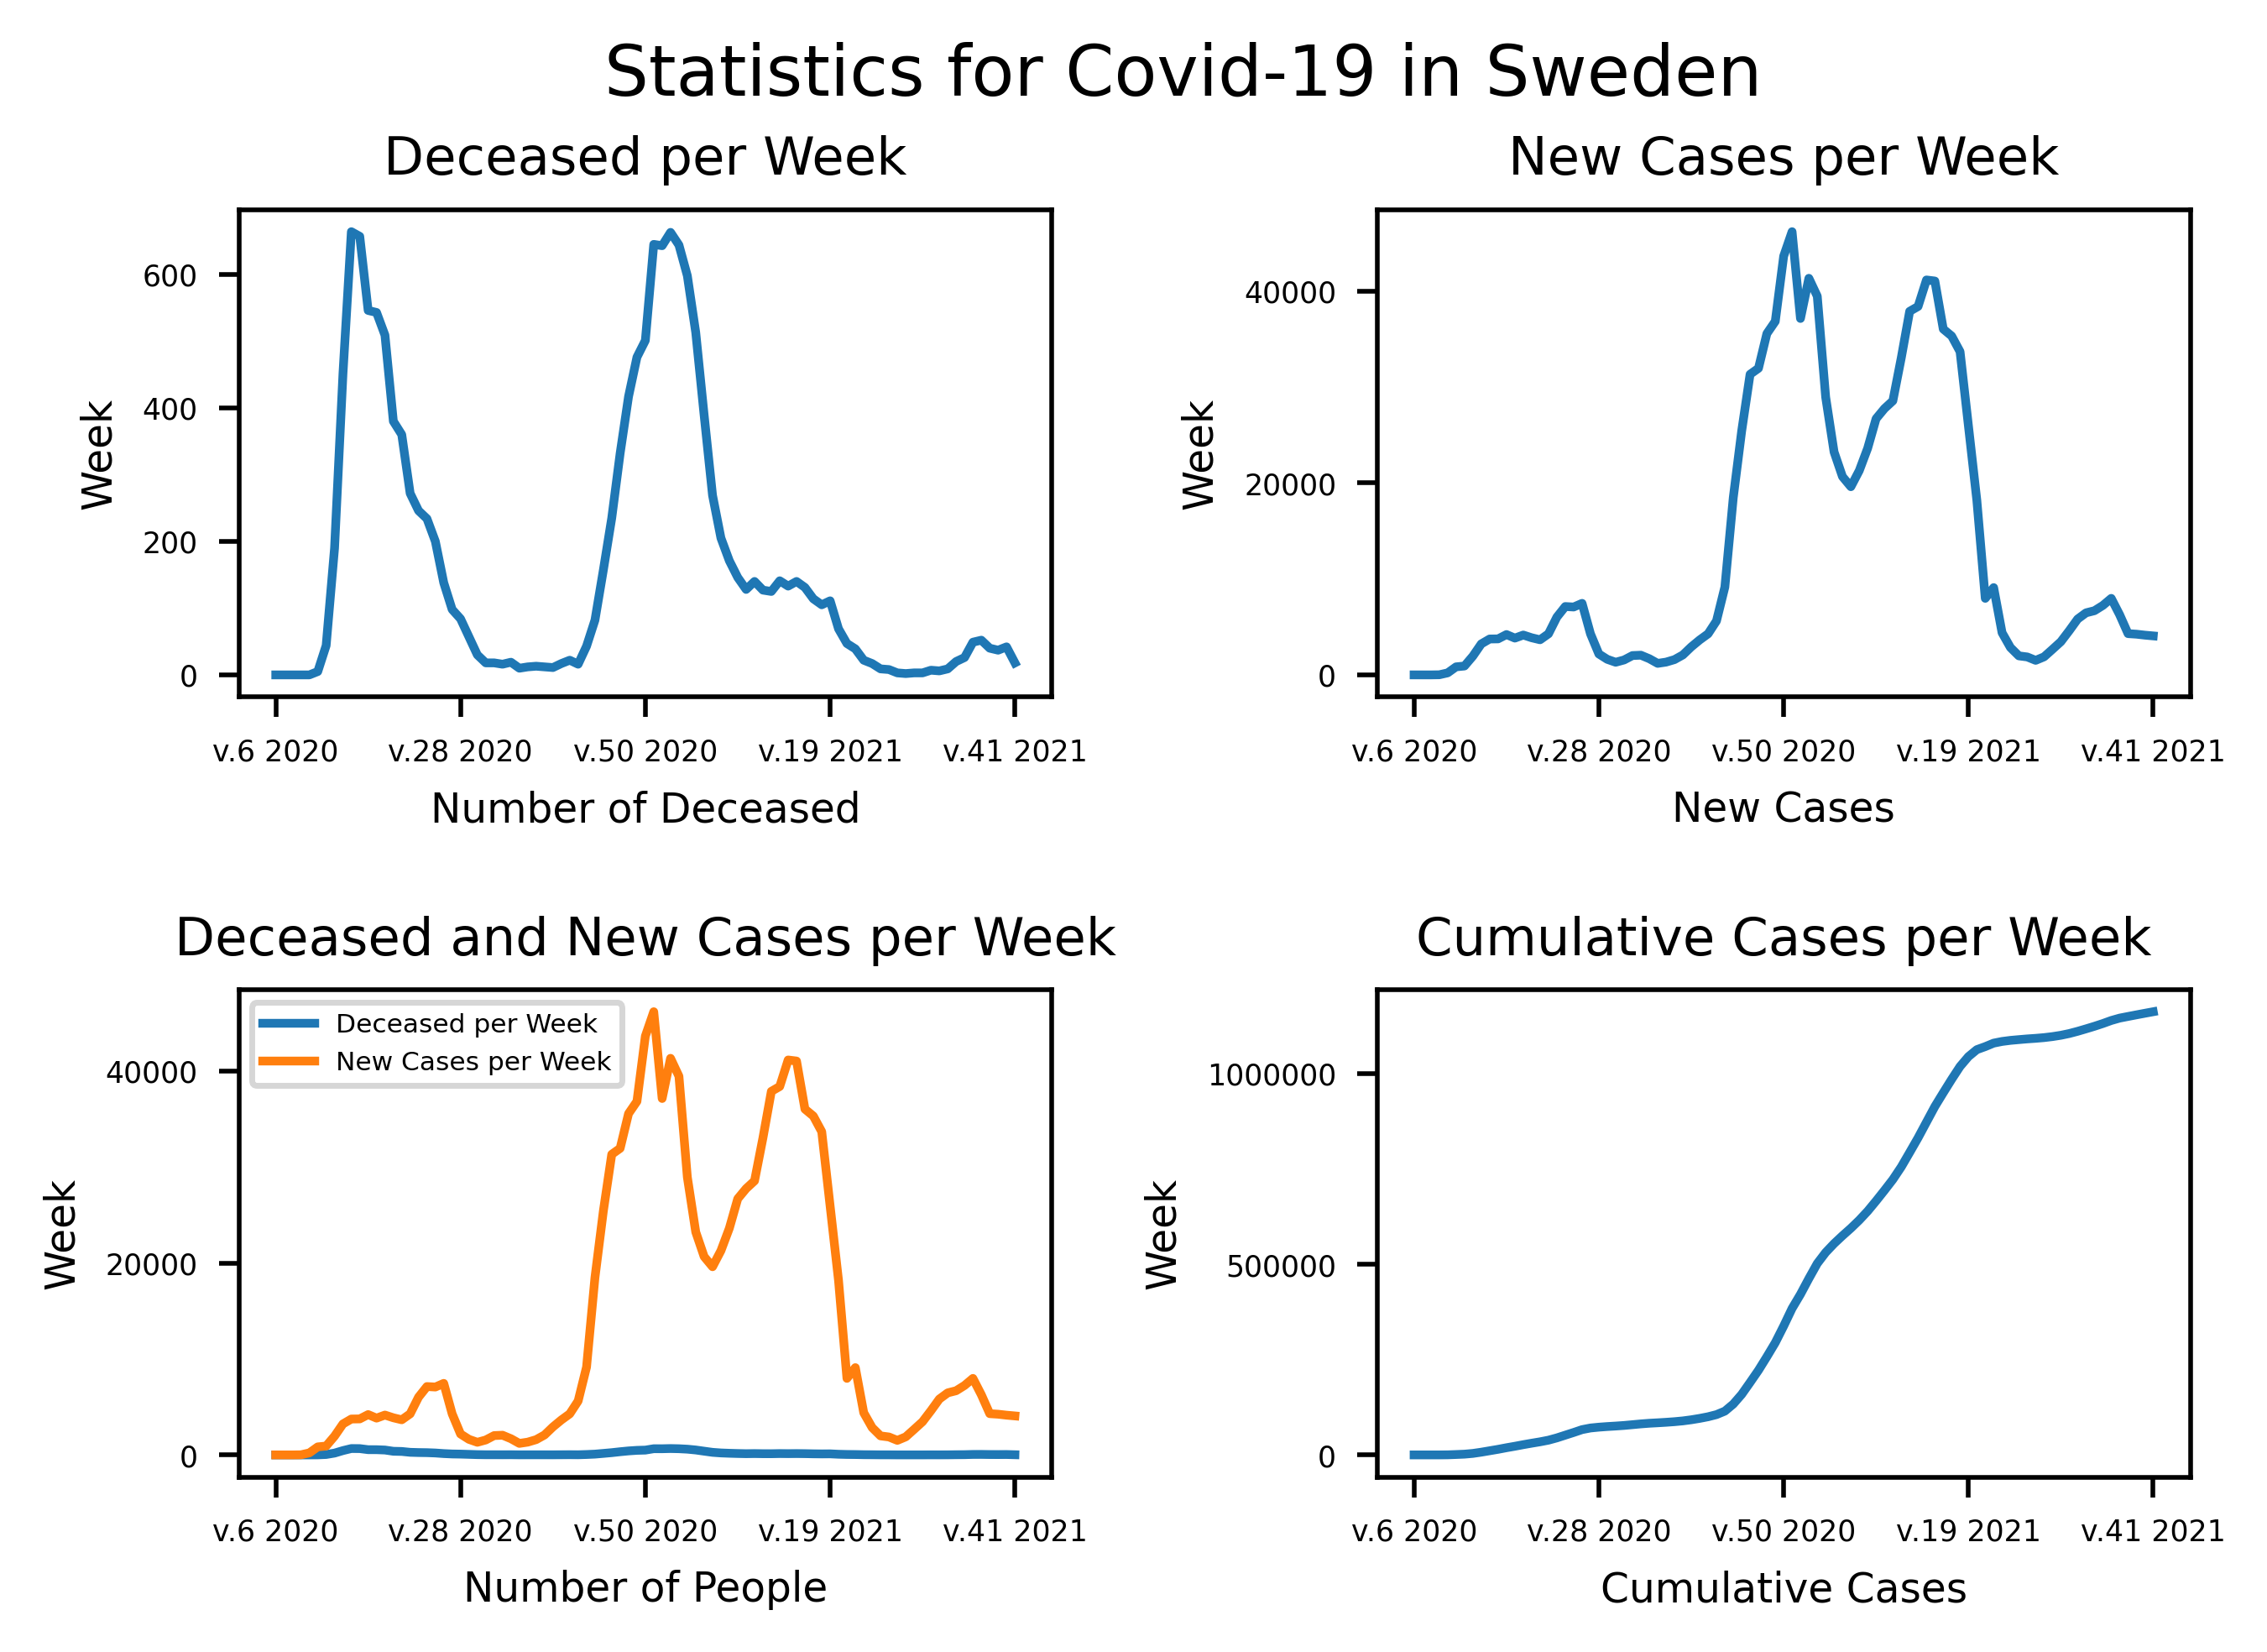

In [91]:
def adjust_x_and_y(plot:str, title:str, x_label:str) -> None:
    '''Adjusts the ticks and changes the labels for the x and y-axis for a plot.'''

    plot.set_title(title, size=9)
    plot.set_xticks([0, 22, 44, 66, 88])
    plot.set_xticklabels(["v.6 2020", "v.28 2020", "v.50 2020", "v.19 2021", "v.41 2021"], size=5)
    plot.set_yticklabels(labels=plot.get_yticks().astype(int), size=5)
    plot.set_xlabel(x_label, size=7)
    plot.set_ylabel("Week", size=7)

#Creates the figure for the subplots
fig, ax = plt.subplots(2,2, dpi=500, facecolor="white")
fig.subplots_adjust(wspace= .4, hspace=.6)
fig.suptitle("Statistics for Covid-19 in Sweden")

#Plots the first subplot
plot1 = sns.lineplot(data=covid, x="Vecka", y="Antal_avlidna_vecka", ax=ax[0,0])
adjust_x_and_y(plot1,"Deceased per Week", "Number of Deceased")

#Plots the second subplot
plot2 = sns.lineplot(data=covid, x="Vecka", y="Antal_fall_vecka", ax=ax[0,1])
adjust_x_and_y(plot2, "New Cases per Week", "New Cases")

#Plots the third subplot
plot3 = sns.lineplot(data=covid, x="Vecka", y="Antal_avlidna_vecka", ax=ax[1,0])
plot3 = sns.lineplot(data=covid, x="Vecka", y="Antal_fall_vecka", ax=ax[1,0])
plot3.legend(["Antal_avlidna_vecka", "Antal_fall_vecka"], labels=["Deceased per Week", "New Cases per Week"], fontsize=4.5, loc="upper left")
adjust_x_and_y(plot3, "Deceased and New Cases per Week", "Number of People")

#Plots the forth subplot
plot4 = sns.lineplot(data=covid, x="Vecka", y="Kum_antal_fall", ax=ax[1,1])
adjust_x_and_y(plot4, "Cumulative Cases per Week", "Cumulative Cases")

plt.savefig("visualiseringar/Statistics_for_Covid-19_in_Sweden.png")